In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
X,y = make_regression(n_samples=300,n_features=1,n_targets=1,noise=20)

In [137]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [139]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('MSE : ',mean_squared_error(y_test,y_pred))

MSE :  317.32156278629463


In [140]:
lr.coef_, lr.intercept_

(array([89.71053052]), -6.992486473172438)

# Gradient Descent from scratch, keeping m constant

In [163]:
class TaraGD:
  def __init__(self,learning_rate,epochs):
    self.m = 89.71
    self.b = 100
    self.learning_rate = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y_train - self.m * X_train.ravel() - self.b)
      #loss intercept
      self.b = self.b - (self.learning_rate * loss_slope) # b_new = b_old - step_size

  def predict(self,X_test):
    return (self.m * X_test) + self.b

In [164]:
t_gd = TaraGD(0.001,55)
t_gd.fit(X_train,y_train)
y_pred1 = t_gd.predict(X_test)

In [165]:
t_gd.m, t_gd.b,

(89.71, -6.992462914364108)

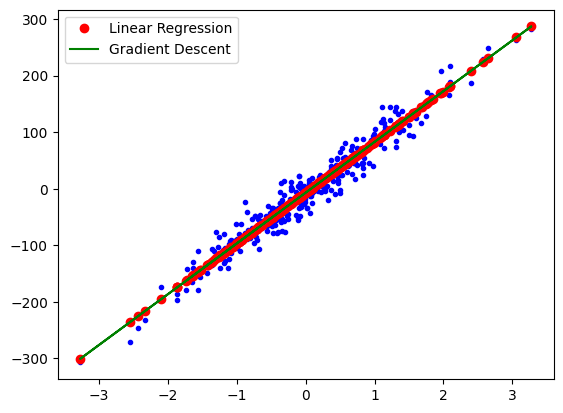

In [175]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),'ro',label = 'Linear Regression')
plt.plot(X,t_gd.predict(X),'g-',label = 'Gradient Descent')
plt.legend()
plt.show()